In [20]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

In [2]:
books = pd.read_csv(f"{path}/books.csv")
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [24]:
# Tipo de dados de cada coluna
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   isbn13               6810 non-null   int64  
 1   isbn10               6810 non-null   object 
 2   title                6810 non-null   object 
 3   subtitle             2381 non-null   object 
 4   authors              6738 non-null   object 
 5   categories           6711 non-null   object 
 6   thumbnail            6481 non-null   object 
 7   description          6548 non-null   object 
 8   published_year       6804 non-null   float64
 9   average_rating       6767 non-null   float64
 10  num_pages            6767 non-null   float64
 11  ratings_count        6767 non-null   float64
 12  missing_description  6810 non-null   int64  
 13  age_of_book          6804 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 745.0+ KB


In [19]:
# Análise descritiva das colunas incluindo colunas não númericas
books.describe(include='all')

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6810,6810,2381,6738,6711,6481,6548,6804.000000,6767.000000,6767.000000,6.767000e+03
unique,NaN,6810,6398,2009,3780,567,6481,6474,NaN,NaN,NaN,NaN
top,NaN,9042003405,The Lord of the Rings,A Novel,Agatha Christie,Fiction,http://books.google.com/books/content?id=2lVyR...,No Marketing Blurb,NaN,NaN,NaN,NaN
freq,NaN,1,11,226,37,2588,1,6,NaN,NaN,NaN,NaN
mean,9.780677e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.000000,4.130000,420.000000,5.992500e+03


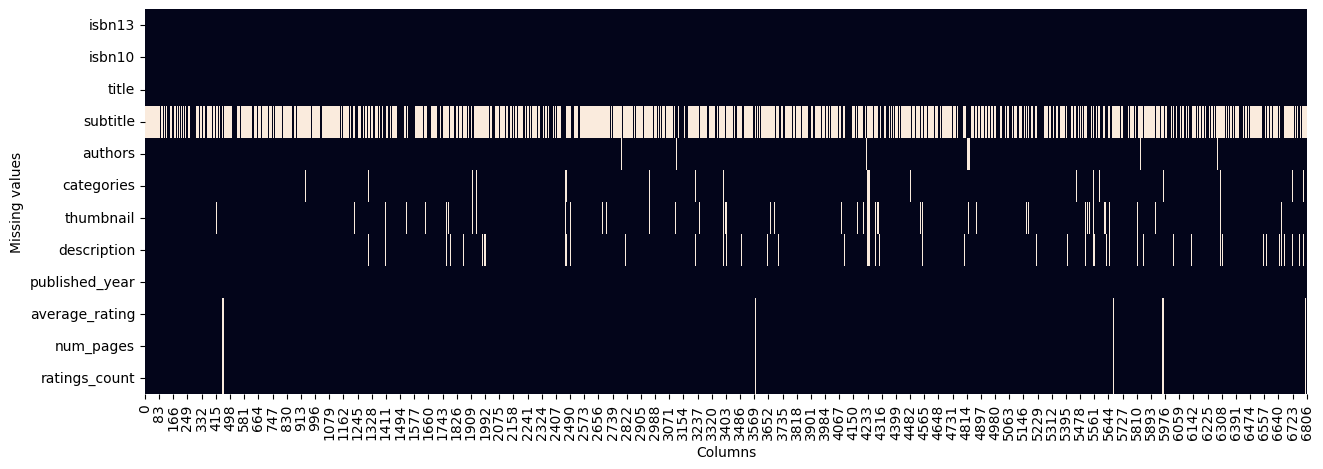

In [ ]:
#visualização de quais colunas têm valores ausentes e em quais linhas

plt.figure(figsize=(15, 5))
ax = plt.axes()

#Pega os valores ausentes, faz uma transposiçao linha por colunas e transforma em um mapa de calor
sns.heatmap(books.isna().transpose(), 
            cbar=False, 
            ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing values")

plt.show()

- O gráfico acima mostra que temos muitos valores ausentes para a coluna *subtitle* 
- Outras colunas também possuem algumas informações faltantes (authors, categories, thumbnail, description, average_rating, num_pages, ratings_count)

In [22]:
# Um dos campos importantes para a semantica é a descrição do livro. Vamos criar uma coluna que indica se a descrição está ausente ou não.
# Também será criada uma coluna que indica a idade do livro, considerando o ano atual como 2025.

books["missing_description"] = np.where(books["description"].isna(), 1, 0)
books["age_of_book"] = 2025 - books["published_year"]

In [26]:
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0


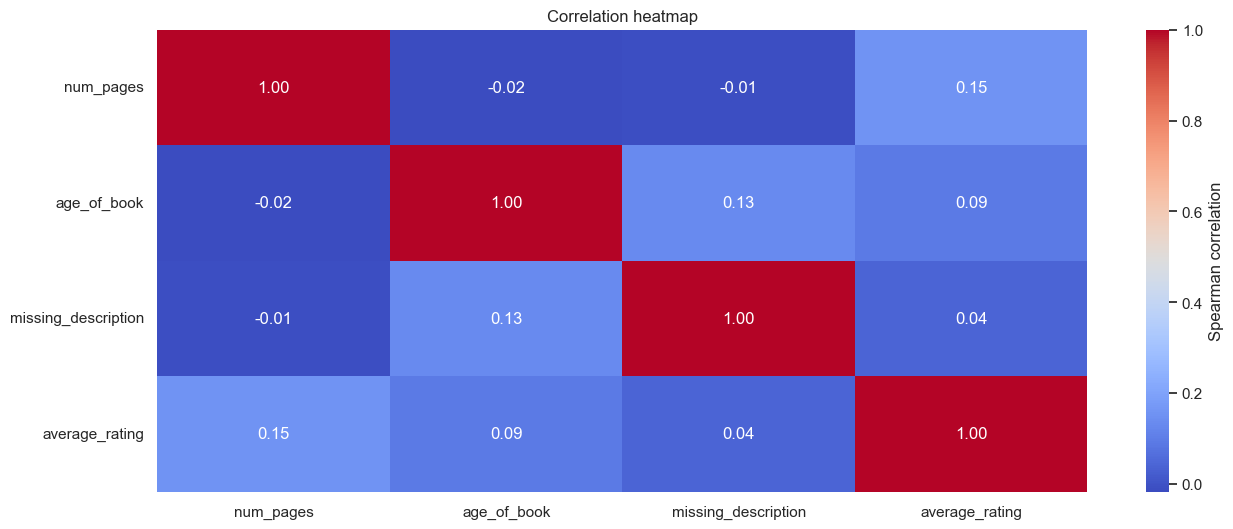

In [39]:
# Vamos analisar se as informações faltantes da descrição do livro tem relação com colunas que podem ser importantes para a semântica do livro.
# Será que a ausência de informação na descrição do livro gera alguns vies? Será que os livros com descrições ausentes tendem a ser, por exemplo, mais antigos, 
# mais curtos ou com avaliações mais baixas/altas? 
# Se houver algum um padrão, a remoção desses livros pode introduzir um viés na recomendação.

columns_of_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"]

# O método de correlação Spearman é melhor usado quando os dados não são continuos e atualmente estamos trabalhando com dados binarios (0 ou 1).
correlation_matrix = books[columns_of_interest].corr(method = "spearman")

sns.set_theme(style="white")
plt.figure(figsize=(15, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
                      cbar_kws={"label": "Spearman correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()

## Análise da matriz de correlação

- Valores de correlação próximos a 1 ou -1 indicam uma correlação muito forte (positiva ou negativa, respectivamente)
- Valores de correlação próximos a 0 indicam uma correlação muito fraca, ou seja, não há uma relação significativa

Como os valores da variável de interesse (missing_description), neste contexto, era fraca (próximo do valor 0), não há problema em eliminar as linhas que estejam vazias. Com a análise de correlação temos maior confiaça para excliu-las.
Para uma substituição desses valores, possívelmente poderia ser feito um web-scrapping para completa-las.

In [ ]:
book_missing = books.dropna(subset=["description", "num_pages", "average_rating", "published_year"])

# Ou pode usar esse script também:
# book_missing = books[~(books["description"].isna()) &
#       ~(books["num_pages"].isna()) &
#       ~(books["average_rating"].isna()) &
#       ~(books["published_year"].isna())
# ]


In [41]:
book_missing.head(10)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0
6,9780006353287,0006353282,An Autobiography,NaN,Agatha Christie,"Authors, English",http://books.google.com/books/content?id=c49GQ...,Donation.,1977.0,4.27,560.0,3975.0,0,48.0
7,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0,0,27.0
8,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0,0,31.0
9,9780006472612,0006472613,Master of the Game,NaN,Sidney Sheldon,Adventure stories,http://books.google.com/books/content?id=TkTYp...,Kate Blackwell is an enigma and one of the mos...,1982.0,4.11,489.0,43540.0,0,43.0


In [48]:
# Vamos analisar separadamente a coluna categories para a coluna com descrição não ausente.
book_missing["categories"].value_counts().reset_index().sort_values("count", ascending=False)


,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
519,Aeronautics,1
518,Childbirth,1
517,Consumer behavior,1
516,Seduction,1


C:\Users\vinic\AppData\Local\Temp\ipykernel_6872\4161917620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing["words_in_description"] = book_missing["description"].str.split().str.len()


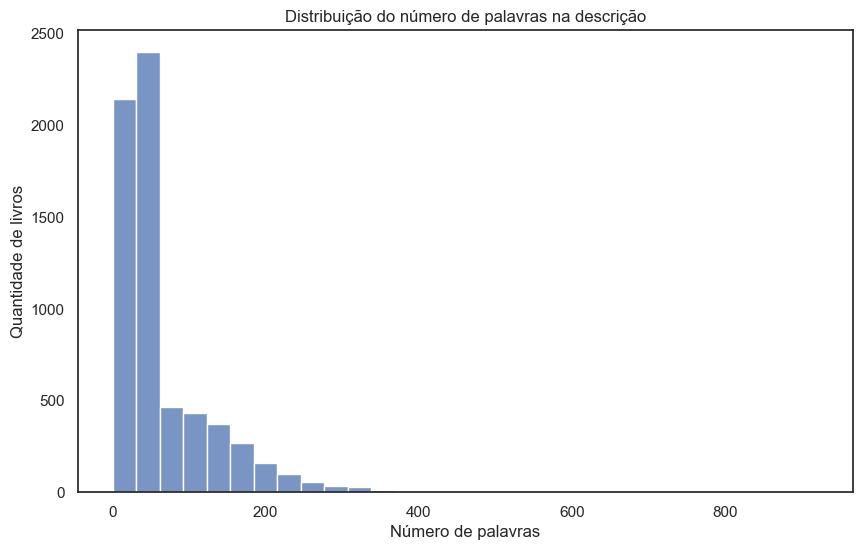

In [ ]:
book_missing["words_in_description"] = book_missing["description"].str.split().str.len()

plt.figure(figsize=(10, 6))
sns.histplot(book_missing["words_in_description"], bins=30, kde=False)

plt.title("Distribuição do número de palavras na descrição")
plt.xlabel("Número de palavras")
plt.ylabel("Quantidade de livros")
plt.show()